<a href="https://colab.research.google.com/github/v-demydchenko/Python-for-DA/blob/main/HW3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Data Analyst/data.python/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [17]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

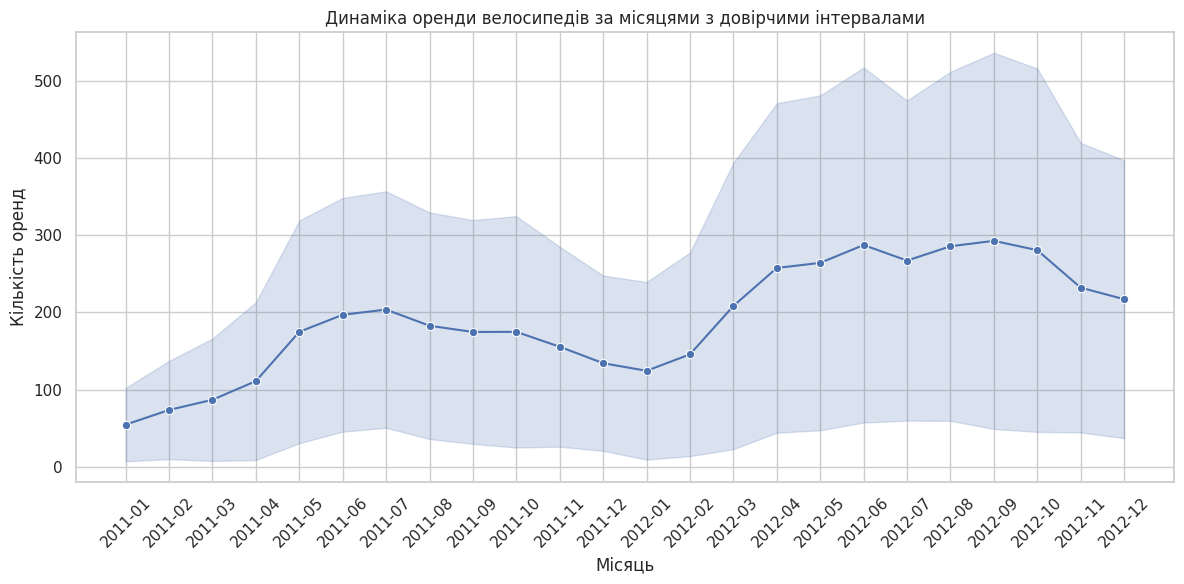

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month_year', marker='o', y='count', errorbar=('sd', 1))
plt.xticks(rotation=45)
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

# я не бачу тут невизначенності даних

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

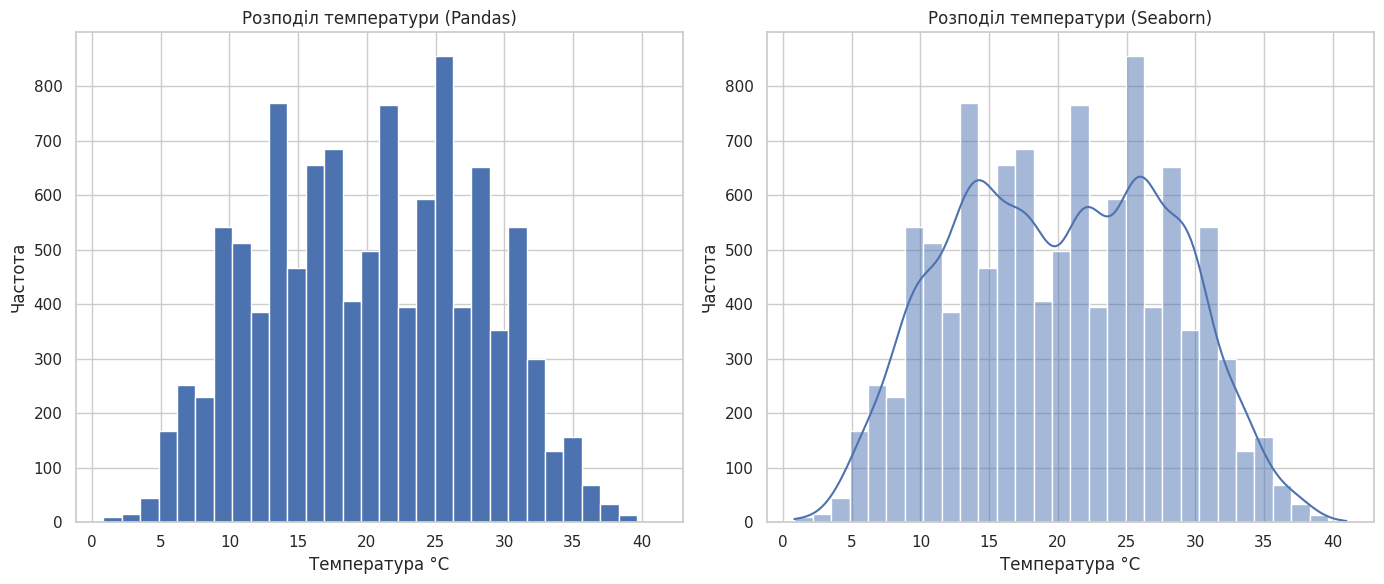

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['temp'].hist(ax=axes[0], bins=30)
axes[0].set_title('Розподіл температури (Pandas)')
axes[0].set_xlabel('Температура °C')
axes[0].set_ylabel('Частота')

sns.histplot(data=df, x='temp', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Розподіл температури (Seaborn)')
axes[1].set_xlabel('Температура °C')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

# 1. суттєвої візуальної різниці я не бачу
# 2. це Kernel Density Estimate. вона показує більш згладжену, більш плавну картину того, як розподілені дані.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

/tmp/ipython-input-44-425602584.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([weather_labels[int(w)] for w in sorted(df['weather'].unique())])


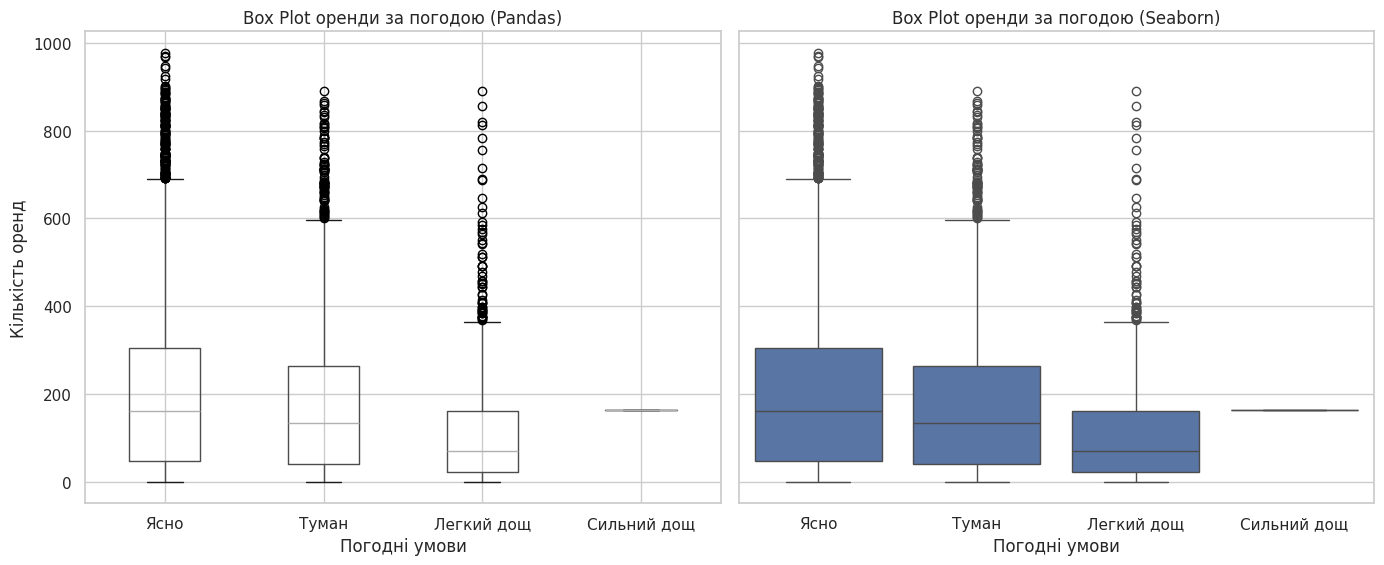

In [44]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

df.boxplot(column='count', by='weather', ax=axes[0])
axes[0].set_title('Box Plot оренди за погодою (Pandas)')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')
axes[0].set_xticks(list(weather_labels.keys()))
axes[0].set_xticklabels(list(weather_labels.values()))
axes[0].grid(True)
plt.suptitle('')

sns.boxplot(data=df, x=df['weather'].astype(str), y='count', ax=axes[1])
axes[1].set_title('Box Plot оренди за погодою (Seaborn)')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')

axes[1].set_xticklabels([weather_labels[int(w)] for w in sorted(df['weather'].unique())])

plt.tight_layout()
plt.show()

# суттєвої різниці я не бачу

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


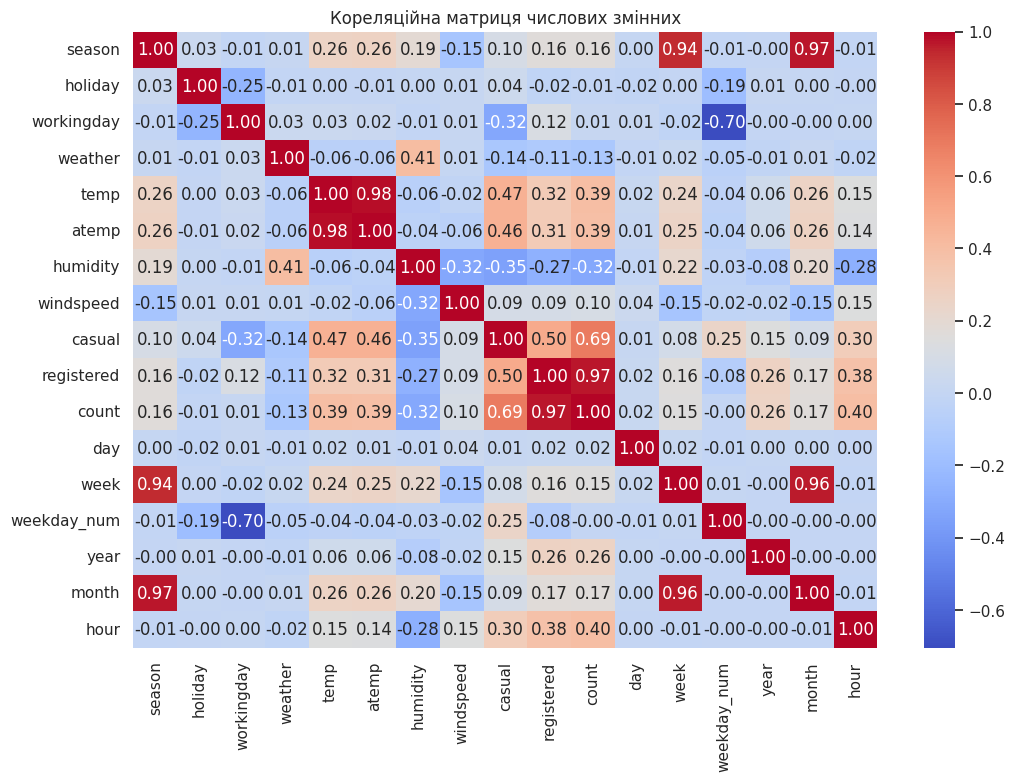

In [55]:
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця числових змінних')
plt.show()

# registered
# ці показники майже ідентичні

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


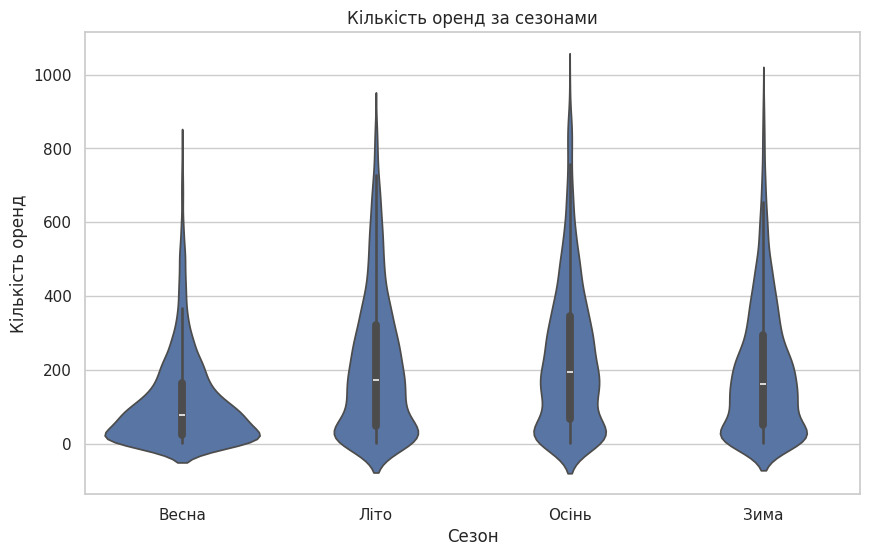

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season', y='count')
plt.title('Кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Весна', 'Літо', 'Осінь', 'Зима'])
plt.show()

# "товщина" violin plot показує частоту даних у вибраному діапазоні
# зима
# violin plot показує щільність даних, має краще візуальне оформлення

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

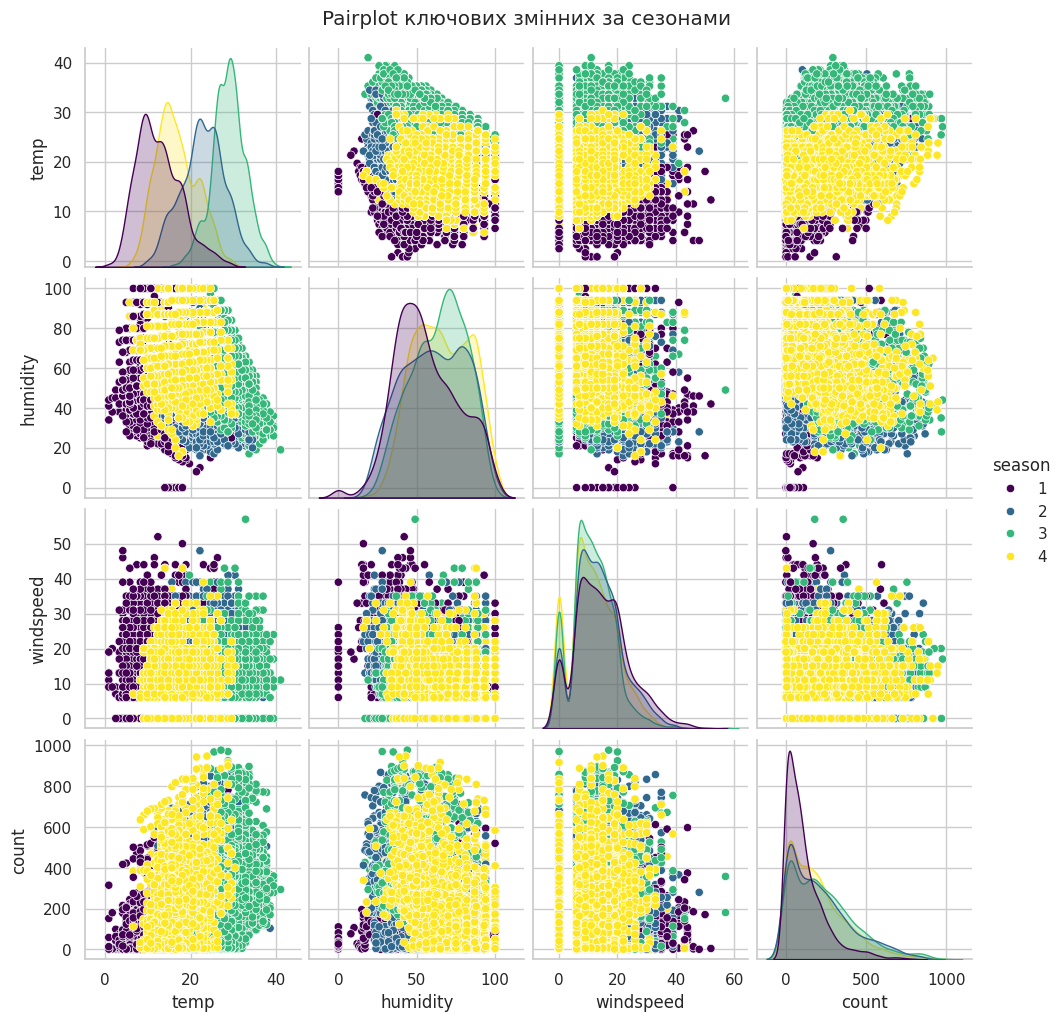

In [56]:
vars_to_plot = ['temp', 'humidity', 'windspeed', 'count']

sns.pairplot(df, vars=vars_to_plot, hue='season', palette='viridis')
plt.suptitle('Pairplot ключових змінних за сезонами', y=1.02)
plt.show()

# temp та count
# температура

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

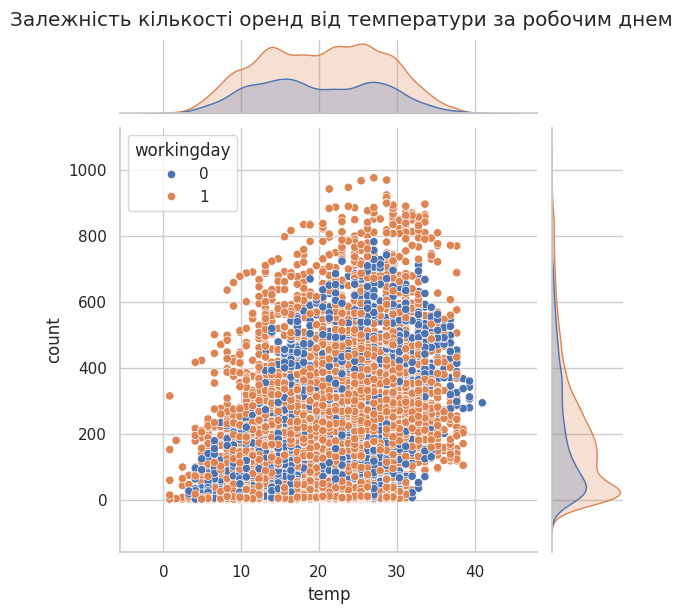

In [57]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday', kind='scatter')
plt.suptitle('Залежність кількості оренд від температури за робочим днем', y=1.02)
plt.show()